## Programming for Data Science 
### 2019/2020 Semester 2 CA2 Assignment 

##### Name: Choo Weng Yan 
##### Class: DIT/FT/1B/14
##### Admission Number: p1940208 

## DATASET 1

## Government Recurrent Expenditure On Education per Student

##### Questions we have about the data:

1. What is the trend in Government Recurrent Expenditure on Education per Student?
2. Which year has the highest expenditure?
3. Which educational level does the government spend the most?
4. What is the average expenditure for each educational level? 


In [23]:
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

expand= pd.read_csv("government-recurrent-expenditure-on-education-per-student.csv",na_values=['NaN'])
#drop rows with null values
expand.dropna()
expand.head()

,year,type_of_educational_institution,expenditure_per_student
0,1986,Primary Schools,1404
1,1986,Secondary Schools,1931
2,1986,Junior Colleges/Centralised Institutes,2606
3,1986,Polytechnics,4143
4,1986,Institute of Technical Education,3924


In [25]:
msg="Information of the Dataset (Table)"
print("*"*len(msg))
print(msg)
print("*"*len(msg))

print("This is the shape of the dataset")
print(expand.shape);print()

print("These are the columns in the dataset")
print(expand.columns);print()

print("The summary of this dataset is shown:")
print(expand.info());print()

print("The data type of the dataset is shown:")
print(expand.dtypes);print()

print("A descriptive statistical summary of this dataset is shown below:")
print(expand['expenditure_per_student'].describe())

expand.head()

**********************************
Information of the Dataset (Table)
**********************************
This is the shape of the dataset
(198, 3)

These are the columns in the dataset
Index(['year', 'type_of_educational_institution', 'expenditure_per_student'], dtype='object')

The summary of this dataset is shown:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
year                               198 non-null int64
type_of_educational_institution    198 non-null object
expenditure_per_student            198 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.7+ KB
None

The data type of the dataset is shown:
year                                int64
type_of_educational_institution    object
expenditure_per_student             int64
dtype: object

A descriptive statistical summary of this dataset is shown below:
count      198.000000
mean      9500.267677
std       5372.994669
min       1404.000000
25%       4918.750000
50%

,year,type_of_educational_institution,expenditure_per_student
0,1986,Primary Schools,1404
1,1986,Secondary Schools,1931
2,1986,Junior Colleges/Centralised Institutes,2606
3,1986,Polytechnics,4143
4,1986,Institute of Technical Education,3924


In [26]:
primary=expand[expand['type_of_educational_institution']=='Primary Schools']
secondary=expand[expand['type_of_educational_institution']=='Secondary Schools']
JC=expand[expand['type_of_educational_institution']=='Junior Colleges/Centralised Institutes']
ITE=expand[expand['type_of_educational_institution']=='Institute of Technical Education']
poly=expand[expand['type_of_educational_institution']=='Polytechnics']
uni=expand[expand['type_of_educational_institution']=='Universities']

#extract rows with certain variables 
df7=expand[expand.type_of_educational_institution.isin(['Primary Schools','Secondary Schools','Junior Colleges/Centralised Institutes','Institute of Technical Education','Polytechnics','Universities'])]

#spread the columns into rows
df9=df7.pivot_table(index='year',columns='type_of_educational_institution',values='expenditure_per_student')

#rename column of index
l_p=df9.reset_index().rename_axis(None,axis=1)
line_p=l_p.dropna()
line_p.head()

msg2="After spreading rows into columns of the Dataset (pivot)"
print("*"*len(msg2))
print(msg2)
print("*"*len(msg2))

print("This is the shape of the dataset:")
print(line_p.shape);print()

print("These are the columns of the dataset:")
print(line_p.columns);print()

print("The data type of the dataset is shown:")
print(line_p.dtypes);print()

print("A descriptive statistical summary of the datset is shown below:")
print(line_p['Universities'].describe());print()

line_p.head()

********************************************************
After spreading rows into columns of the Dataset (pivot)
********************************************************
This is the shape of the dataset:
(26, 7)

These are the columns of the dataset:
Index(['year', 'Institute of Technical Education',
       'Junior Colleges/Centralised Institutes', 'Polytechnics',
       'Primary Schools', 'Secondary Schools', 'Universities'],
      dtype='object')

The data type of the dataset is shown:
year                                        int64
Institute of Technical Education          float64
Junior Colleges/Centralised Institutes    float64
Polytechnics                              float64
Primary Schools                           float64
Secondary Schools                         float64
Universities                              float64
dtype: object

A descriptive statistical summary of the datset is shown below:
count       26.000000
mean     16032.576923
std       2505.132462
min      11

,year,Institute of Technical Education,Junior Colleges/Centralised Institutes,Polytechnics,Primary Schools,Secondary Schools,Universities
0,1986,3924.0,2606.0,4143.0,1404.0,1931.0,11874.0
1,1987,3631.0,2643.0,4219.0,1474.0,2042.0,11993.0
2,1988,3802.0,2858.0,4803.0,1692.0,2364.0,14248.0
3,1989,4262.0,3332.0,5755.0,1892.0,2574.0,13965.0
4,1990,4883.0,3956.0,5916.0,2013.0,2843.0,13615.0


In [114]:
#extract variables that i want 
primary=line_p['Primary Schools']
secondary=line_p['Secondary Schools']
JC=line_p['Junior Colleges/Centralised Institutes']
ITE=line_p['Institute of Technical Education']
poly=line_p['Polytechnics']
uni=line_p['Universities']

#extract the year
year=line_p['year']

data_plot=[primary,secondary,JC,ITE,poly,uni]
data_plot

[0     1404.0
 1     1474.0
 2     1692.0
 3     1892.0
 4     2013.0
 5     2062.0
 6     2061.0
 7     2254.0
 8     2523.0
 9     2653.0
 10    2837.0
 11    2960.0
 12    2808.0
 13    2612.0
 14    3137.0
 15    3363.0
 16    3535.0
 17    3508.0
 18    3575.0
 19    3820.0
 20    4243.0
 21    5026.0
 22    5397.0
 23    5537.0
 24    6624.0
 25    6712.0
 Name: Primary Schools, dtype: float64, 0     1931.0
 1     2042.0
 2     2364.0
 3     2574.0
 4     2843.0
 5     3004.0
 6     3129.0
 7     3412.0
 8     3488.0
 9     3680.0
 10    4152.0
 11    4469.0
 12    4472.0
 13    4409.0
 14    5104.0
 15    5304.0
 16    5614.0
 17    5437.0
 18    5746.0
 19    5793.0
 20    6246.0
 21    7230.0
 22    7551.0
 23    7736.0
 24    9008.0
 25    9022.0
 Name: Secondary Schools, dtype: float64, 0      2606.0
 1      2643.0
 2      2858.0
 3      3332.0
 4      3956.0
 5      4574.0
 6      4780.0
 7      5178.0
 8      5832.0
 9      6363.0
 10     6726.0
 11     7052.0
 12     6346

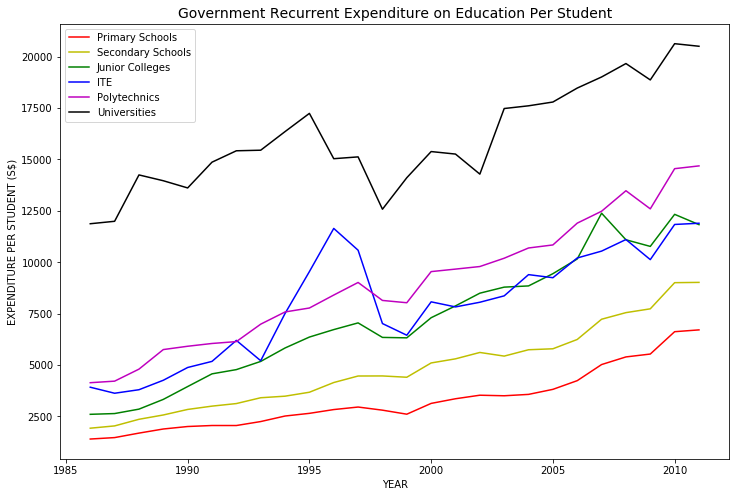

In [48]:
#line graph

plt.figure(figsize=(12, 8))
p1=plt.plot(year,primary,"r-")
p2=plt.plot(year,secondary,"y-")
p3=plt.plot(year,JC,"g-")
p4=plt.plot(year,ITE,"b-")
p5=plt.plot(year,poly,"m-")
p6=plt.plot(year,uni,"k-")

plt.title("Government Recurrent Expenditure on Education Per Student",fontsize=14)
plt.xlabel("YEAR")
plt.ylabel("EXPENDITURE PER STUDENT (S$)")

plt.legend((p1[0],p2[0],p3[0],p4[0],p5[0],p6[0]), ('Primary Schools','Secondary Schools','Junior Colleges','ITE','Polytechnics','Universities'))
plt.show()

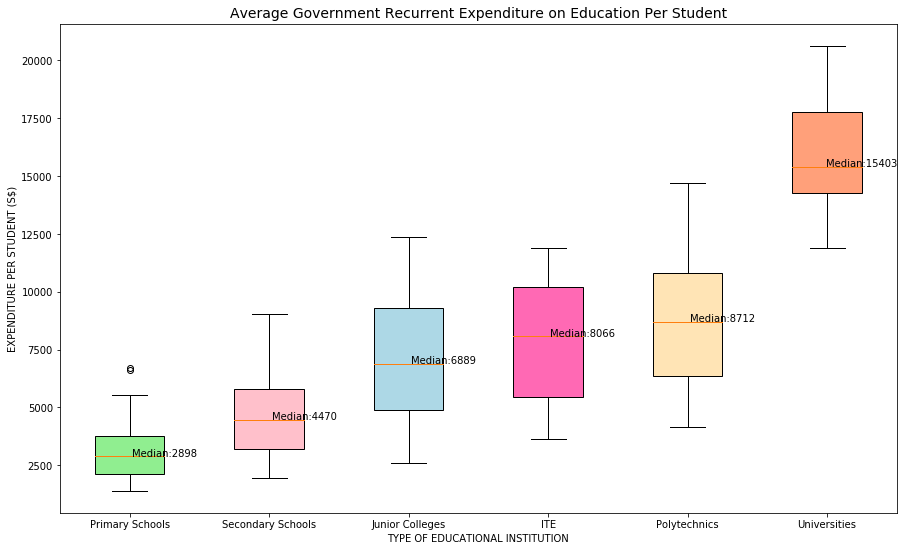

In [117]:
#boxplot
plt.figure(figsize=(15,9))
bp=plt.boxplot(data_plot,labels=['Primary Schools','Secondary Schools','Junior Colleges','ITE','Polytechnics','Universities'],patch_artist=True)
colors=['lightgreen','pink','lightblue','hotpink','moccasin','lightsalmon']
patchcolor = list(zip(bp['boxes'], colors))

#set color for each boxplot
for patch,color in patchcolor:
    patch.set_facecolor(color)

#get median line and text
for line in bp['medians']:
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, 'Median:{:.0f}'.format(y),
         horizontalalignment='center',fontsize=10) # draw above, centered

    
plt.title("Average Government Recurrent Expenditure on Education Per Student",fontsize=14)
plt.xlabel("TYPE OF EDUCATIONAL INSTITUTION")
plt.ylabel("EXPENDITURE PER STUDENT (S$)")

plt.show()

## DATASET 2

# Pupils Per Teacher in Primary And Secondary Schools

##### Questions we have about the data:
1. What is the trend in the number of primary and secondary students per teacher over the years?

2. Which year has the lowest number of students per teacher? 

3. What is the average number of students per teacher over the years? 


In [28]:
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

primary= pd.read_csv("pupils-per-teacher-in-primary-schools.csv")
secondary=pd.read_csv("pupils-per-teacher-in-secondary-schools.csv")

#merge two tables into one table
df=pd.merge(primary,secondary,how='right',on='year')

#extract years after 2007
df1=df[df.year>2007]

df1.head()

secondary.head()

,year,sec_pupil_to_teacher
0,1981,20.6
1,1982,20.6
2,1983,20.7
3,1984,22.6
4,1985,21.8


In [29]:
msg1="Information about Number of Primary & Secondary Students per teacher (After Merging the table)"
print("*"*len(msg1))
print(msg1)
print("*"*len(msg1))

print("This is the shape of the dataset:")
print(df1.shape);print()

print("These are the columns in the dataset:")
print(df1.columns);print()

print("These are the datatype of the dataset:")
print(df1.dtypes);print()

print("A summary of this dataset is shown below:")
print(df1.info());print()

print("A descriptive statistical summary of this dataset is shown below: (Primary Schools)")
print(df1['primary_students_to_teaching_staff'].describe());print()

print("A descriptive statistical summary of this dataset is shown below: (Secondary Schools)")
print(df1['sec_pupil_to_teacher'].describe())
df1.head()

**********************************************************************************************
Information about Number of Primary & Secondary Students per teacher (After Merging the table)
**********************************************************************************************
This is the shape of the dataset:
(11, 3)

These are the columns in the dataset:
Index(['year', 'primary_students_to_teaching_staff', 'sec_pupil_to_teacher'], dtype='object')

These are the datatype of the dataset:
year                                    int64
primary_students_to_teaching_staff    float64
sec_pupil_to_teacher                  float64
dtype: object

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 27 to 37
Data columns (total 3 columns):
year                                  11 non-null int64
primary_students_to_teaching_staff    11 non-null float64
sec_pupil_to_teacher                  11 non-null float64
dtypes: float64(2), int64(1)
m

,year,primary_students_to_teaching_staff,sec_pupil_to_teacher
27,2008,21.4,17.9
28,2009,19.6,16.4
29,2010,19.3,16.1
30,2011,18.6,14.8
31,2012,17.7,13.9


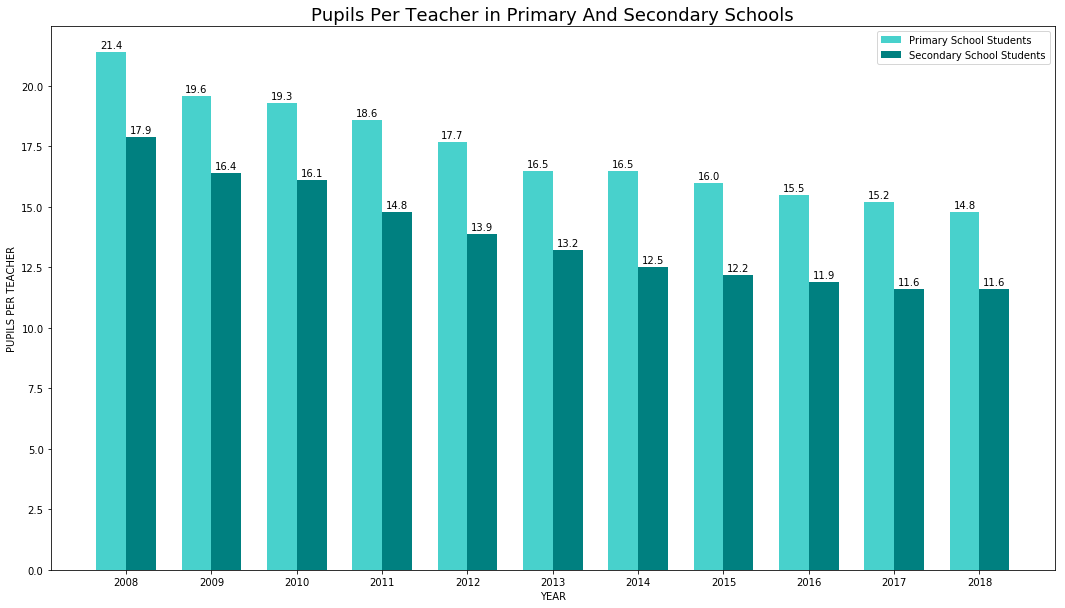

In [57]:
#extract year column
year=df1['year']
x = np.arange(len(year))

#width of the bar 
width = 0.35  
fig, ax = plt.subplots(figsize=(18, 10))

#plot grouped bar chart 
pri = ax.bar(x - width/2,df1['primary_students_to_teaching_staff'], width, label='Primary School Students',color='mediumturquoise')
sec = ax.bar(x + width/2, df1['sec_pupil_to_teacher'], width, label='Secondary School Students',color='teal')

ax.set_xlabel('YEAR')
ax.set_ylabel('PUPILS PER TEACHER')

ax.set_title('Pupils Per Teacher in Primary And Secondary Schools',size=18)
ax.set_xticks(x)
ax.set_xticklabels(year)
ax.legend()

#labels 
def autolabel(yearss):
    for y in yearss:
        height = y.get_height()
        ax.annotate('{}'.format(height),
                    xy=(y.get_x() + y.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(pri)
autolabel(sec)

plt.show()

## DATASET 3

# Number of Classes and Class Size by Level

##### Questions we have about the data:
1. What is the observed trend in number of classes and average size of class over the years?

2. Is there a relationship between number of classes and average size of a class in Primary School ? 

3. Is there a relationship between number of classes and average size of a class in Secondary School? 


In [35]:
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

num_class= pd.read_csv("number-of-classes-and-class-size-by-level.csv")

msg3="Information about Number of Class and Average class Size"
print("*"*len(msg3))
print(msg3)
print("*"*len(msg3))

print("This is the shape of the dataset:")
print(num_class.shape);print()

print("These are the columns in the dataset:")
print(num_class.columns);print()

print("These are the datatype of the dataset:")
print(num_class.dtypes);print()

print("A summary of this dataset is shown below:")
print(num_class.info());print()

print("A descriptive statistical summary of this dataset is shown below: (Number of classes)")
print(num_class['no_of_classes'].describe());print()

print("A descriptive statistical summary of this dataset is shown below: (Average class size)")
print(num_class['ave_class_size'].describe())
num_class.head()

********************************************************
Information about Number of Class and Average class Size
********************************************************
This is the shape of the dataset:
(701, 5)

These are the columns in the dataset:
Index(['year', 'level_of_education', 'level', 'no_of_classes',
       'ave_class_size'],
      dtype='object')

These are the datatype of the dataset:
year                    int64
level_of_education     object
level                  object
no_of_classes           int64
ave_class_size        float64
dtype: object

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 5 columns):
year                  701 non-null int64
level_of_education    701 non-null object
level                 701 non-null object
no_of_classes         701 non-null int64
ave_class_size        701 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 27.5+ KB
None

A descr

,year,level_of_education,level,no_of_classes,ave_class_size
0,1982,Primary,All,8200,35.0
1,1982,Primary,Primary 1,1072,36.9
2,1982,Primary,Primary 2,1137,37.5
3,1982,Primary,Primary 3,1251,37.3
4,1982,Primary,Primary 4,1457,33.8


In [39]:
#extract all levels
num_class1=num_class[num_class.level=="All"]

#extract only primary and secondary 
num_class2=num_class1[num_class1['level_of_education'].isin(["Primary","Secondary"])]
num_class2.drop('level',axis=1)


#extract primary 
num_class2Pri=num_class2[num_class2.level_of_education=='Primary']

#extract number of classes column
no_class=num_class2Pri['no_of_classes']
#no_class

#extract average size of a class in primary
avg_size=num_class2Pri['ave_class_size']
#avg_size

#extract secondary 
num_class2Sec=num_class2[num_class2.level_of_education=='Secondary']

#extract no of classses column for sec
no_class_sec=num_class2Sec['no_of_classes']

#extract average size of a class in secondary 
avg_size_sec=num_class2Sec['ave_class_size']
avg_size_sec



9      32.2
28     34.0
47     33.6
66     32.8
85     33.6
104    33.5
123    34.1
142    32.8
161    32.6
180    32.3
199    31.7
218    31.7
237    34.5
256    34.9
275    35.0
294    34.6
313    34.3
332    34.7
351    35.3
370    35.9
389    36.2
408    36.5
427    36.7
446    36.5
465    36.4
484    36.7
503    36.6
522    36.0
541    36.6
560    36.3
579    35.9
598    35.4
617    34.7
636    34.3
655    34.1
674    33.9
695    33.8
Name: ave_class_size, dtype: float64

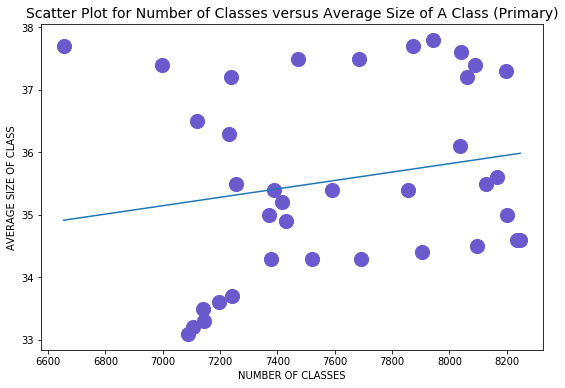

In [54]:
#scatter plot (primary school)

plt.figure(figsize=(9,6))
plt.scatter(no_class,avg_size,s=200,color="slateblue")

#line of best fit 
plt.plot(np.unique(no_class), np.poly1d(np.polyfit(no_class, avg_size, 1))(np.unique(no_class)))
plt.title("Scatter Plot for Number of Classes versus Average Size of A Class (Primary)",fontsize=14)
plt.xlabel("NUMBER OF CLASSES")
plt.ylabel("AVERAGE SIZE OF CLASS")

plt.show()

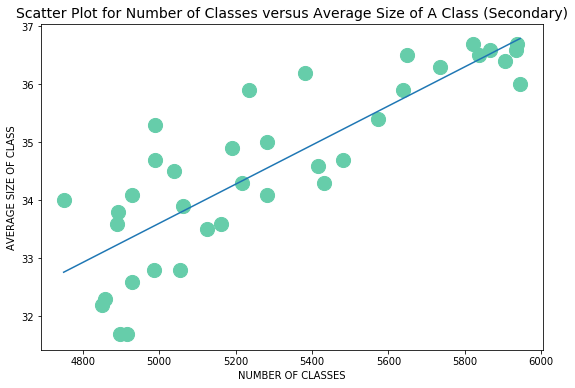

In [55]:
#scatter plot (secondary school)

plt.figure(figsize=(9,6))
plt.scatter(no_class_sec,avg_size_sec,s=200,color="mediumaquamarine")

#line of best fit 
plt.plot(np.unique(no_class_sec), np.poly1d(np.polyfit(no_class_sec, avg_size_sec, 1))(np.unique(no_class_sec)))
plt.title("Scatter Plot for Number of Classes versus Average Size of A Class (Secondary)",fontsize=14)
plt.xlabel("NUMBER OF CLASSES")
plt.ylabel("AVERAGE SIZE OF CLASS")

plt.show()

## DATASET 4

# Universities - Intake, Enrolment and Graduates by Course

##### Questions we have about the data:
1. Which course has the highest number of intake among all the universities?

2. Which course has the lowest number of intake in universities? 

3. Which course has the highest number of graduates from universities? 


In [1]:
import warnings 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

intake= pd.read_csv("universities-intake-enrolment-and-graduates-by-course.csv")
intake.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


,year,sex,course,intake,enrolment,graduates
0,2005,MF,Accountancy,876,2561,706
1,2005,F,Accountancy,530,1732,495
2,2005,MF,"Architecture, Building & Real Estate",299,1310,180
3,2005,F,"Architecture, Building & Real Estate",175,786,106
4,2005,MF,Business & Administration,1545,5013,1256


In [31]:
msg4="Information of the Dataset (table)"
print("*"*len(msg4))
print(msg4)
print("*"*len(msg4))

print("This is the shape of the dataset:")
print(intake.shape);print()

print("These are the columns in the dataset: ")
print(intake.columns);print()

print("These are the data type of the dataset:")
print(intake.dtypes);print()

print("A summary of this dataset is shown below:")
print(intake.info());print()

print("A descriptive statistical summary of this dataset is shown below: (Intake)")
print(intake['intake'].describe());print()

print("A descriptive statistical summary of this dataset is shown below: (Enrolment)")
print(intake['enrolment'].describe());print()

print("A descriptive statistical summary of this dataset is shown below: (Graduates)")
print(intake['graduates'].describe())
intake.head()

**********************************
Information of the Dataset (table)
**********************************
This is the shape of the dataset:
(420, 6)

These are the columns in the dataset: 
Index(['year', 'sex', 'course', 'intake', 'enrolment', 'graduates'], dtype='object')

These are the data type of the dataset:
year          int64
sex          object
course       object
intake       object
enrolment    object
graduates    object
dtype: object

A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
year         420 non-null int64
sex          420 non-null object
course       420 non-null object
intake       420 non-null object
enrolment    420 non-null object
graduates    420 non-null object
dtypes: int64(1), object(5)
memory usage: 19.8+ KB
None

A descriptive statistical summary of this dataset is shown below: (Intake)
count     420
unique    331
top         0
freq       14
Name: intake, dtype:

,year,sex,course,intake,enrolment,graduates
0,2005,MF,Accountancy,876,2561,706
1,2005,F,Accountancy,530,1732,495
2,2005,MF,"Architecture, Building & Real Estate",299,1310,180
3,2005,F,"Architecture, Building & Real Estate",175,786,106
4,2005,MF,Business & Administration,1545,5013,1256


In [3]:
#extract year 2018 
year18=intake.loc[:,'year']>2017

#extract columns that i want
inyear=intake[year18][['year','course','intake']]

#remove comma from numbers
inyear['intake']=inyear['intake'].str.replace(',', '').astype(int)
inyear

#extract the course and add the total of intakes 
account=inyear[inyear['course']=="Accountancy"]
account_sum=account[account.columns[2]].sum()
account_sum

arc=inyear[inyear['course']=="Architecture, Building & Real Estate"]
arc_sum=arc[arc.columns[2]].sum()
arc_sum

BA=inyear[inyear['course']=="Business & Administration"]
BA_sum=BA[BA.columns[2]].sum()
BA_sum

dentist=inyear[inyear['course']=="Dentistry"]
dentist_sum=dentist[dentist.columns[2]].sum()
dentist_sum

edu=inyear[inyear['course']=="Education"]
edu_sum=edu[edu.columns[2]].sum()
edu_sum

ES=inyear[inyear['course']=="Engineering Sciences"]
ES_sum=ES[ES.columns[2]].sum()
ES_sum

art=inyear[inyear['course']=="Fine & Applied Arts"]
art_sum=art[art.columns[2]].sum()
art_sum

health=inyear[inyear['course']=="Health Sciences"]
health_sum=health[health.columns[2]].sum()
health_sum

IT=inyear[inyear['course']=="Information Technology"]
IT_sum=IT[IT.columns[2]].sum()
IT_sum

law=inyear[inyear['course']=="Law"]
law_sum=law[law.columns[2]].sum()
law_sum

mass=inyear[inyear['course']=="Mass Communication"]
mass_sum=mass[mass.columns[2]].sum()
mass_sum

med=inyear[inyear['course']=="Medicine"]
med_sum=med[med.columns[2]].sum()
med_sum

NPM=inyear[inyear['course']=="Natural, Physical & Mathematical Sciences"]
NPM_sum=NPM[NPM.columns[2]].sum()
NPM_sum

service=inyear[inyear['course']=="Services"]
service_sum=service[service.columns[2]].sum()
service_sum


326

In [32]:
#new dataframe for number of intake in 2018
new_intake = pd.DataFrame({'course': ['Accountancy','Architecture, Building & Real Estate' , 'Business & Administration', 'Dentistry', 'Education','Engineering Sciences','Fine & Applied Arts','Health Sciences','Information Technology','Law','Mass Communication','Medicine','Natural, Physical & Mathematical Sciences','Services'],
                     'intake': [account_sum , arc_sum , BA_sum , dentist_sum , edu_sum , ES_sum ,art_sum , health_sum, IT_sum , law_sum , mass_sum , med_sum ,NPM_sum,service_sum]})


msg5="Information about the Number of intake for Each Course in Universities 2018"
print("*"*len(msg5))
print(msg5)
print("*"*len(msg5))

print("This is the shape of the dataset:")
print(new_intake.shape);print()

print("These are the columns in the dataset:")
print(new_intake.columns);print()

print("These are the datatype of the dataset:")
print(new_intake.dtypes);print()

print("A descriptive statistical summary of this dataset os shown below")
print(new_intake['intake'].describe());print()
new_intake.head()

***************************************************************************
Information about the Number of intake for Each Course in Universities 2018
***************************************************************************
This is the shape of the dataset:
(14, 2)

These are the columns in the dataset:
Index(['course', 'intake'], dtype='object')

These are the datatype of the dataset:
course    object
intake     int64
dtype: object

A descriptive statistical summary of this dataset os shown below
count      14.000000
mean     1739.071429
std      1901.494128
min        93.000000
25%       465.000000
50%       722.000000
75%      2529.250000
max      6697.000000
Name: intake, dtype: float64



,course,intake
0,Accountancy,2152
1,"Architecture, Building & Real Estate",738
2,Business & Administration,4486
3,Dentistry,93
4,Education,405


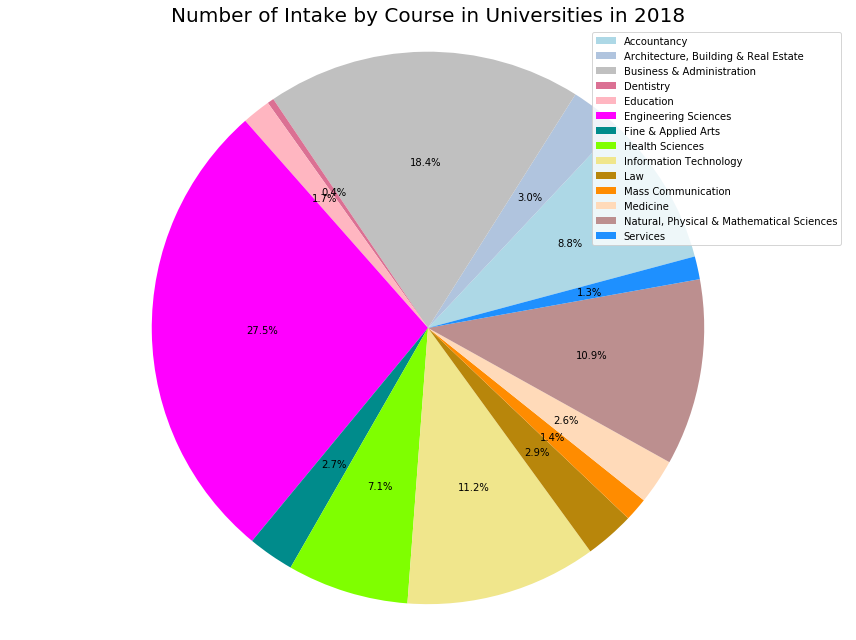

In [30]:
#pie chart

plt.figure(figsize=(12,9))
Colours=['lightblue','lightsteelblue','silver','palevioletred','lightpink','fuchsia','darkcyan','chartreuse','khaki','darkgoldenrod','darkorange','peachpuff','rosybrown','dodgerblue']
labels=new_intake['course']

plt.pie(new_intake['intake'],
        #Assign colours list
       colors = Colours,
        #first data angle
        startangle = 15,
        #percentage value
        autopct='%1.1f%%'
       )

#legends
plt.legend( labels, loc="upper right")
plt.title("Number of Intake by Course in Universities in 2018",fontsize=20)
plt.axis('equal')
plt.tight_layout()

In [33]:
#extract data in 2018 
y18=intake[intake['year']==2018]

#drop columns 
y18=y18.drop(['sex','intake'],axis=1)

#remove commas 
y18['enrolment']=y18['enrolment'].str.replace(',', '').astype(int)
y18['graduates']=y18['graduates'].str.replace(',','').astype(int)

msg6="Information Universities courses, enrolement and gradueates in 2018"
print("*"*len(msg6))
print(msg6)
print("*"*len(msg6))

print("This is the shape of the dataset:")
print(y18.shape);print()

print("These are the columns in the dataset:")
print(y18.columns);print()

print("These are the datatype in the dataset:")
print(y18.dtypes);print()

print("A descriptive statistical summary of this dataset is shown below: (Enrolment)")
print(y18['enrolment'].describe());print()

print("A descriptive statistical summary of this dataset is shown below: (Graduates)")
print(y18['graduates'].describe());print()
y18.head()

*******************************************************************
Information Universities courses, enrolement and gradueates in 2018
*******************************************************************
This is the shape of the dataset:
(30, 4)

These are the columns in the dataset:
Index(['year', 'course', 'enrolment', 'graduates'], dtype='object')

These are the datatype in the dataset:
year          int64
course       object
enrolment     int64
graduates     int64
dtype: object

A descriptive statistical summary of this dataset is shown below: (Enrolment)
count       30.000000
mean      3532.766667
std       4129.275696
min        135.000000
25%        788.000000
50%       1916.000000
75%       5141.500000
max      17656.000000
Name: enrolment, dtype: float64

A descriptive statistical summary of this dataset is shown below: (Graduates)
count      30.000000
mean      843.266667
std       984.014365
min        39.000000
25%       204.250000
50%       394.000000
75%      1239.500000


,year,course,enrolment,graduates
390,2018,Accountancy,5219,1299
391,2018,Accountancy,2898,720
392,2018,"Architecture, Building & Real Estate",1993,517
393,2018,"Architecture, Building & Real Estate",1190,343
394,2018,Business & Administration,9018,1884


In [18]:
##extract certain course and add them up to get total number of graduates
acc=y18[y18['course']=="Accountancy"]
acc_sum=acc[acc.columns[3]].sum()
acc_sum

ar=y18[y18['course']=="Architecture, Building & Real Estate"]
ar_sum=ar[ar.columns[3]].sum()
ar_sum

ba=y18[y18['course']=="Business & Administration"]
ba_sum=ba[ba.columns[3]].sum()
ba_sum

dent=y18[y18['course']=="Dentistry"]
dent_sum=dent[dent.columns[3]].sum()
dent_sum

ed=y18[y18['course']=="Education"]
ed_sum=ed[ed.columns[3]].sum()
ed_sum

es=y18[y18['course']=="Engineering Sciences"]
es_sum=es[es.columns[3]].sum()
es_sum

arts=y18[y18['course']=="Fine & Applied Arts"]
arts_sum=arts[arts.columns[3]].sum()
arts_sum

hs=y18[y18['course']=="Health Sciences"]
hs_sum=hs[hs.columns[3]].sum()
hs_sum

it=y18[y18['course']=="Information Technology"]
it_sum=it[it.columns[3]].sum()
it_sum

la=y18[y18['course']=="Law"]
la_sum=la[la.columns[3]].sum()
la_sum

mc=y18[y18['course']=="Mass Communication"]
mc_sum=mc[mc.columns[3]].sum()
mc_sum

medi=y18[y18['course']=="Medicine"]
medi_sum=medi[medi.columns[3]].sum()
medi_sum

npm=y18[y18['course']=="Natural, Physical & Mathematical Sciences"]
npm_sum=npm[npm.columns[3]].sum()
npm_sum

ser=y18[y18['course']=="Services"]
ser_sum=ser[ser.columns[3]].sum()
ser_sum

296

In [34]:
#new dataframw for number of graduates in 2018 for each course
no_grad = pd.DataFrame({'course': ['Accountancy','Architecture, Building & Real Estate' , 'Business & Administration', 'Dentistry', 'Education','Engineering Sciences','Fine & Applied Arts','Health Sciences','Information Technology','Law','Mass Communication','Medicine','Natural, Physical & Mathematical Sciences','Services'],
                     'graduates': [acc_sum , ar_sum , ba_sum , dent_sum , ed_sum , es_sum ,arts_sum , hs_sum, it_sum , la_sum , mc_sum , medi_sum ,npm_sum,ser_sum]})

no_grad.head()

msg7="Informatiom about course and graduates in Universities"
print("*"*len(msg7))
print(msg7)
print("*"*len(msg7))

print("This is the shape of the dataset:")
print(no_grad.shape);print()

print("These are the columns in the dataset:")
print(no_grad.columns);print()

print("These are the datatype of the dataset:")
print(no_grad.dtypes);print()

print("A descriptive statistical summary of this dataset is shown below:")
print(no_grad['graduates'].describe());print()
no_grad.head()

******************************************************
Informatiom about course and graduates in Universities
******************************************************
This is the shape of the dataset:
(14, 2)

These are the columns in the dataset:
Index(['course', 'graduates'], dtype='object')

These are the datatype of the dataset:
course       object
graduates     int64
dtype: object

A descriptive statistical summary of this dataset is shown below:
count      14.000000
mean     1457.357143
std      1559.271803
min        92.000000
25%       517.750000
50%       795.000000
75%      1918.500000
max      5606.000000
Name: graduates, dtype: float64



,course,graduates
0,Accountancy,2019
1,"Architecture, Building & Real Estate",860
2,Business & Administration,2931
3,Dentistry,92
4,Education,509


Text(0, 0.5, 'NUMBER OF GRADUATES')

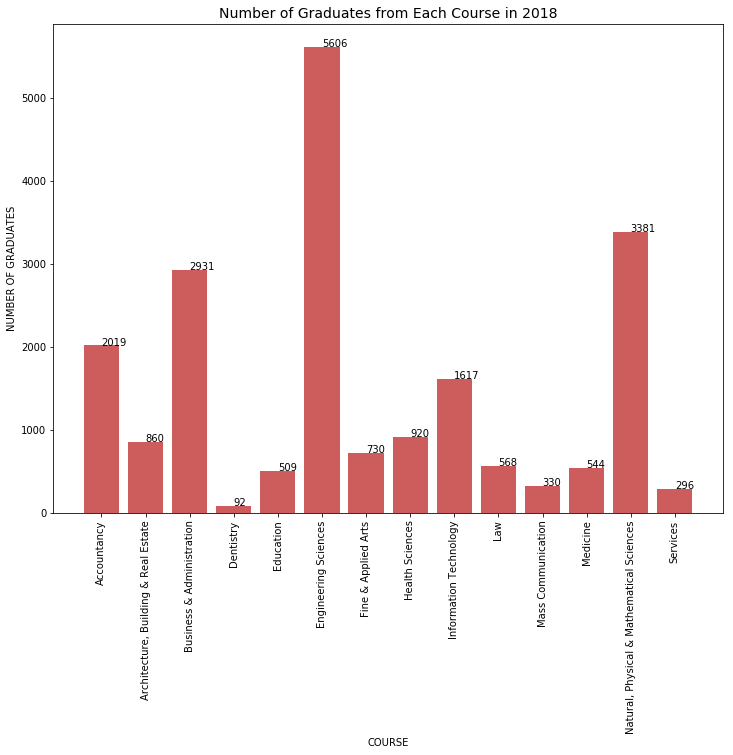

In [20]:
grad=no_grad['graduates']
g_course=no_grad['course']
labels=no_grad['course']

plt.figure(figsize=(12, 9))
plt.bar(g_course,grad,width=0.8,color="indianred")

#show text labels on top of each bar
for a,b in zip(g_course, grad):
    plt.text(a, b, str(b))
    
plt.title("Number of Graduates from Each Course in 2018",fontsize=14)
plt.xlabel("COURSE")
plt.xticks(rotation=90)
plt.ylabel("NUMBER OF GRADUATES")